## Check out the datatypes

This test was used in learning phase, having only classifications of 0 and 1.

If the datatypes are incorrect, change them to correct ones.

Before gathering the data and teaching the Random Forest model, you should have: Sky View Factor (SVF) images, Impoundment Size Index (ISI) images, High Pass median Filter (HPMF) images, slope and label3m images (in total 5 different types of files). 

Datatypes:
<li>SVF from 0.0 to 1.0 (making histogram from SVF is in enhance_svf.ipynb)
<li>HPMF for example 18 to 4, -1.5 to 1.3)
<li>ISI 0... 255 (for example 0-85, 60-200)
<li>slope (degrees)
<li>label3m binary (0's and 1's, boolean - true, false)

<ul> To view your files, use the read_and_view_npy_files.ipynb

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

### Label3m to binary if it's not

Label3m_1.npy: Unique values = [0 1]
Converting Label3m_1.npy to binary.
Label3m_1.npy converted and saved as binary.
Label3m_10.npy: Unique values = [0 1]
Converting Label3m_10.npy to binary.
Label3m_10.npy converted and saved as binary.
Label3m_11.npy: Unique values = [0 1]
Converting Label3m_11.npy to binary.
Label3m_11.npy converted and saved as binary.
Label3m_12.npy: Unique values = [0 1]
Converting Label3m_12.npy to binary.
Label3m_12.npy converted and saved as binary.
Label3m_13.npy: Unique values = [0 1]
Converting Label3m_13.npy to binary.
Label3m_13.npy converted and saved as binary.
Label3m_14.npy: Unique values = [0 1]
Converting Label3m_14.npy to binary.
Label3m_14.npy converted and saved as binary.
Label3m_15.npy: Unique values = [0 1]
Converting Label3m_15.npy to binary.
Label3m_15.npy converted and saved as binary.
Label3m_16.npy: Unique values = [0 1]
Converting Label3m_16.npy to binary.
Label3m_16.npy converted and saved as binary.
Label3m_17.npy: Unique values = [0 

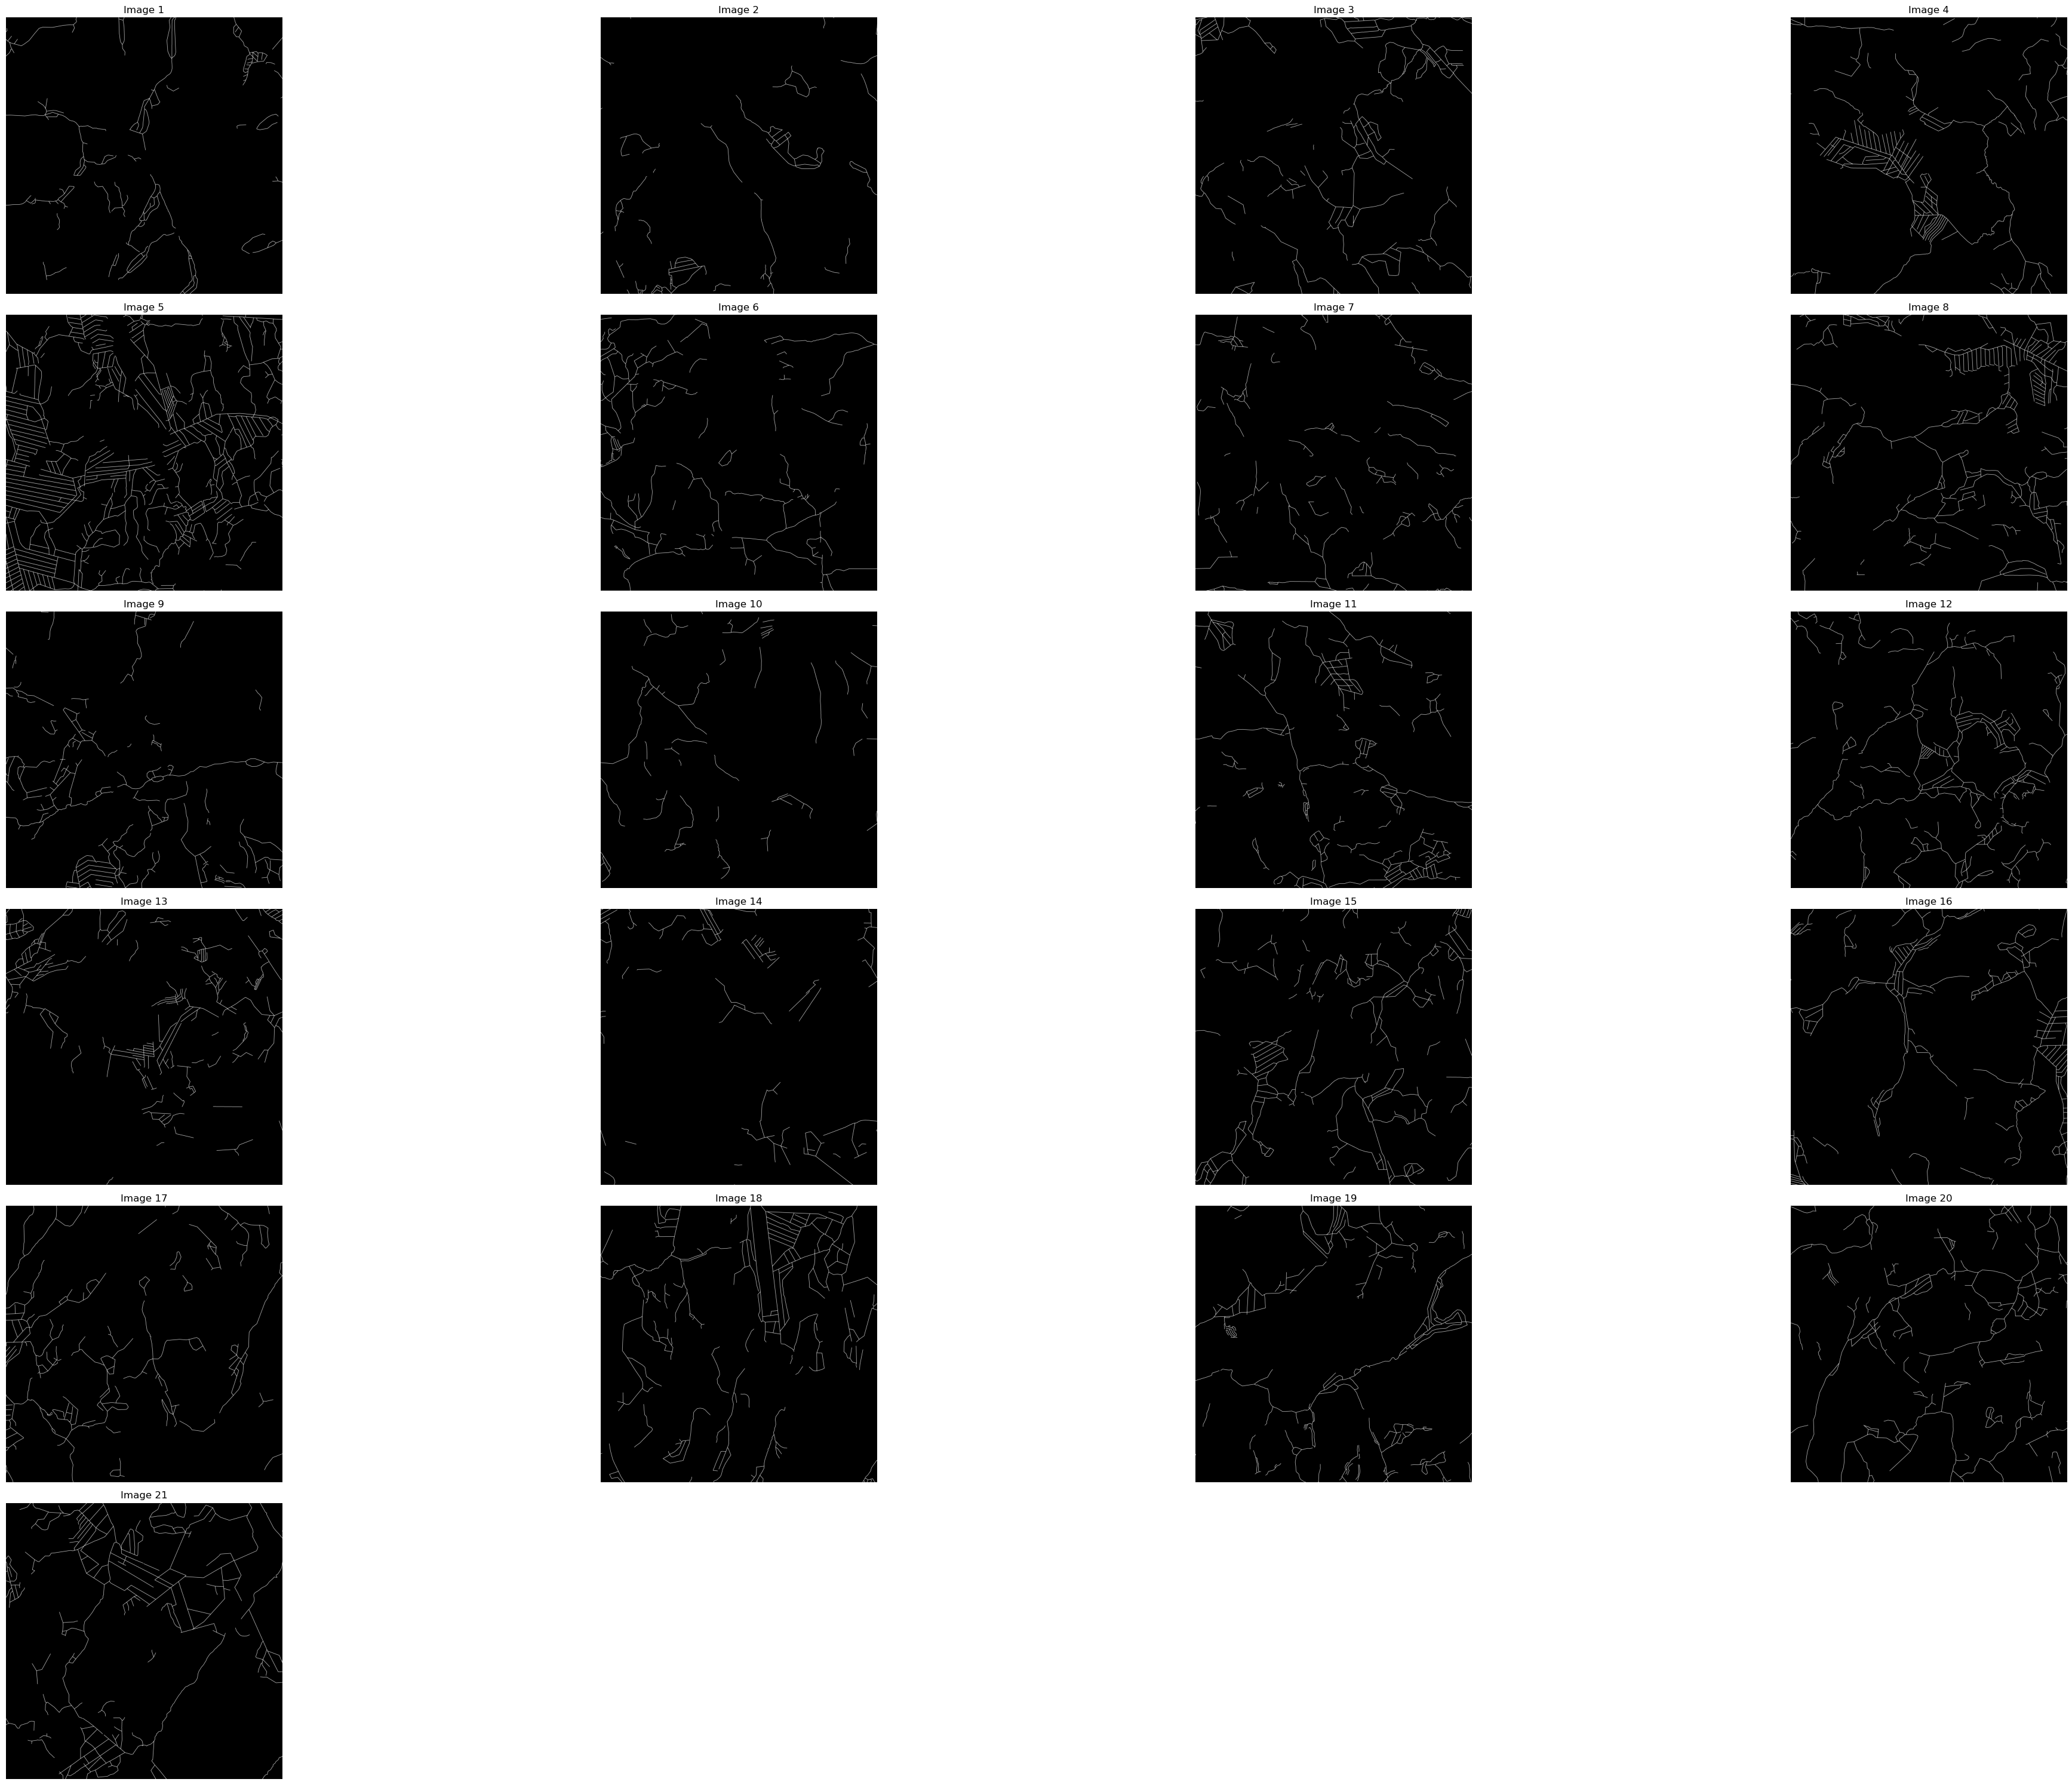

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Define paths
features_path = "../../01_Data/01_Raw/features/features"

# List of all `label3m_*.npy` files in features_path
label_files = [f for f in os.listdir(features_path) if f.startswith("Label3m_") and f.endswith(".npy")]

# Prepare to plot the 21 images, with 4 per row
plt.figure(figsize=(40, 30))  # Adjust the figure size to fit 21 images (4 per row)

# Loop through each label file and plot
for idx, label_file in enumerate(label_files):
    try:
        # Load the .npy file
        label_mask_path = os.path.join(features_path, label_file)
        label_mask = np.load(label_mask_path)

        # Check if the file is binary
        unique_values = np.unique(label_mask)
        print(f"{label_file}: Unique values = {unique_values}")

        # Convert to binary (bool) type if not already binary
       # if not np.array_equal(unique_values, [0, 1]): #this was commented to get the label into boolean
        print(f"Converting {label_file} to binary.")
        binary_label = np.where(label_mask > 0, 1, 0).astype(bool)  # Convert to boolean
        np.save(label_mask_path, binary_label)  # Overwrite the original file with binary data (bool type)
        print(f"{label_file} converted and saved as binary.")
       # else:
           # print(f"{label_file} is already binary. No changes made.")
           # binary_label = label_mask  # Keep the original if it's already binary

        # Plotting each image in the 21-image grid
        row = idx // 4  # Determine the row (0-based index)
        col = idx % 4   # Determine the column (0-based index)

        # Create subplot in the correct position (6 rows, 4 columns)
        plt.subplot(6, 4, idx + 1)  # 6 rows, 4 columns
        plt.title(f"Image {idx + 1}")  # Optional: Title for each image
        plt.imshow(binary_label, cmap='gray')
        plt.axis('off')  # Hide axis for cleaner look

    except Exception as e:
        print(f"Error processing {label_file}: {e}")

# Adjust layout for neat display
plt.tight_layout()
plt.show()


In [2]:
import os
import numpy as np

# Define the path
features_path = "../../../01_Data/01_Raw/features/features/"

# List all `Label3m_*.npy` files
label_files = [f for f in os.listdir(features_path) if f.startswith("Label3m_") and f.endswith(".npy")]

# Loop through and print the datatype
for label_file in label_files:
    label_path = os.path.join(features_path, label_file)
    try:
        label_data = np.load(label_path)
        print(f"{label_file}: Data type = {label_data.dtype}")
    except Exception as e:
        print(f"Error reading {label_file}: {e}")


Label3m_1.npy: Data type = uint8
Label3m_10.npy: Data type = uint8
Label3m_11.npy: Data type = uint8
Label3m_12.npy: Data type = uint8
Label3m_13.npy: Data type = uint8
Label3m_14.npy: Data type = uint8
Label3m_15.npy: Data type = uint8
Label3m_16.npy: Data type = uint8
Label3m_17.npy: Data type = uint8
Label3m_18.npy: Data type = uint8
Label3m_19.npy: Data type = uint8
Label3m_2.npy: Data type = uint8
Label3m_20.npy: Data type = uint8
Label3m_21.npy: Data type = uint8
Label3m_3.npy: Data type = uint8
Label3m_4.npy: Data type = uint8
Label3m_5.npy: Data type = uint8
Label3m_6.npy: Data type = uint8
Label3m_7.npy: Data type = uint8
Label3m_8.npy: Data type = uint8
Label3m_9.npy: Data type = uint8


### Change the streams to boolean

Use this if you don't nees categorising. In other case, leave the data as uint8.

In [4]:
import os
import numpy as np

# Define the path
features_path = "../../../01_Data/01_Raw/features/features/"

# List all `Label3m_*.npy` files
label_files = [f for f in os.listdir(features_path) if f.startswith("Label3m_") and f.endswith(".npy")]

# Loop through and process each file
for label_file in label_files:
    label_path = os.path.join(features_path, label_file)
    try:
        # Load the data
        label_data = np.load(label_path)
        print(f"{label_file}: Data type before = {label_data.dtype}")

        # Convert uint8 (or int8) to boolean (assuming 0 = False, 1 & 2 = True)
        if label_data.dtype in [np.uint8, np.int8]:
            label_data = label_data > 0  # Converts to boolean

            # Save the modified data
            np.save(label_path, label_data)
            print(f"{label_file}: Converted to boolean and saved.")

        else:
            print(f"{label_file}: Skipped (not uint8 or int8).")

    except Exception as e:
        print(f"Error processing {label_file}: {e}")


Label3m_1.npy: Data type before = uint8
Label3m_1.npy: Converted to boolean and saved.
Label3m_10.npy: Data type before = uint8
Label3m_10.npy: Converted to boolean and saved.
Label3m_11.npy: Data type before = uint8
Label3m_11.npy: Converted to boolean and saved.
Label3m_12.npy: Data type before = uint8
Label3m_12.npy: Converted to boolean and saved.
Label3m_13.npy: Data type before = uint8
Label3m_13.npy: Converted to boolean and saved.
Label3m_14.npy: Data type before = uint8
Label3m_14.npy: Converted to boolean and saved.
Label3m_15.npy: Data type before = uint8
Label3m_15.npy: Converted to boolean and saved.
Label3m_16.npy: Data type before = uint8
Label3m_16.npy: Converted to boolean and saved.
Label3m_17.npy: Data type before = uint8
Label3m_17.npy: Converted to boolean and saved.
Label3m_18.npy: Data type before = uint8
Label3m_18.npy: Converted to boolean and saved.
Label3m_19.npy: Data type before = uint8
Label3m_19.npy: Converted to boolean and saved.
Label3m_2.npy: Data typ